# CS5228 Rental Prediction

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from matplotlib.colors import ListedColormap
# load data
train_data = pd.read_csv('./data/processed/train.csv')
test_data = pd.read_csv('./data/processed/test.csv')

X_train, y_train = train_data.drop(columns='monthly_rent'), train_data['monthly_rent'].copy()
X_test = test_data

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [89]:
def plot_validation_results(param_to_scores):

    plt.figure()

    param_to_validation_scores = {k: scores[1] for (k, scores) in param_to_scores.items()}
    
    # Plot the scores for each fold
    for param, scores in param_to_validation_scores.items():
        plt.scatter([param] * len(scores), scores)

    # Calculate mean and standard variation across all folds for each parameter value
    score_mean = np.array([np.mean(v) for k,v in sorted(param_to_validation_scores.items())])
    score_std = np.array([np.std(v) for k,v in sorted(param_to_validation_scores.items())])
    
    # Plot error bar
    plt.errorbar(sorted(param_to_validation_scores.keys()), score_mean, yerr=score_std)
    
    plt.xlabel('param')
    plt.ylabel('Cross-Validation RSME Score')
    plt.show()

    

def plot_scores(param_to_scores):

    plt.figure()

    param_to_training_scores = {k: scores[0] for (k, scores) in param_to_scores.items()}
    param_to_validation_scores = {k: scores[1] for (k, scores) in param_to_scores.items()}
    
    # Calculate mean and standard variation across all folds for each parameter value
    training_score_mean = np.array([np.mean(v) for k,v in sorted(param_to_training_scores.items())])
    validation_score_mean = np.array([np.mean(v) for k,v in sorted(param_to_validation_scores.items())])
    
    # Plot error bar
    plt.plot(sorted(param_to_training_scores.keys()), training_score_mean, label ='Training Score')
    plt.plot(sorted(param_to_validation_scores.keys()), validation_score_mean, label ='Validation Score')
    plt.legend(loc='lower right') 
    
    plt.xlabel('param')
    plt.ylabel('Cross-Validation RSME Score')
    plt.show()         


In [9]:

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, verbose=1),
    'Random Forest': RandomForestRegressor(random_state=42, verbose=1, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, verbose=1, n_estimators=300, max_depth=4, learning_rate=0.15, subsample=0.8, max_features=0.8),
    # 'SVM': SVR(),
}
# train models and save results

"""
for name, model in models.items():
    print(f'Training {name}...')
    
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} training completed.')

    # Create a dataframe with two columns: Id & Predicted
    result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
    save_path = './data/predictions/' + name + '.csv'
    result_df.to_csv(save_path, index=False)
    print(f'{name} training result saved.\n')


"""




Training Linear Regression...
Linear Regression training completed.
Linear Regression training result saved.

Linear Regression evaluation:

257473.80855002976 393.54769874401273


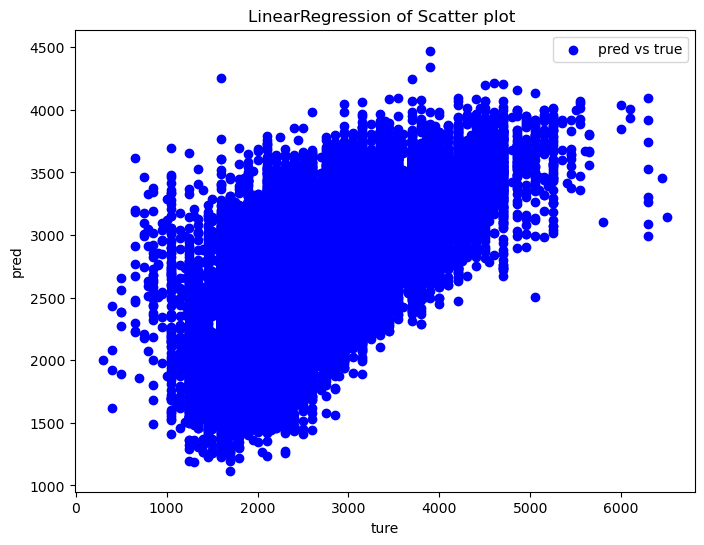

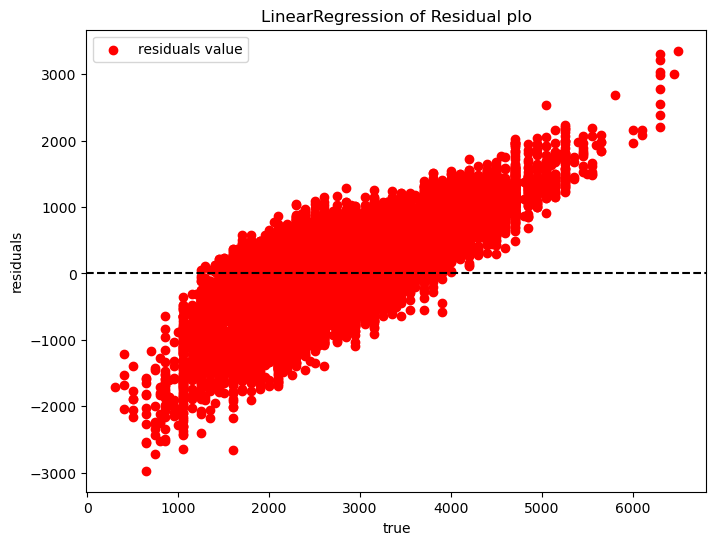

In [60]:
# train different model and evaluation
# For LinearRegression
name_LinearRegression = 'Linear Regression'
model_LinearRegression = LinearRegression()
print(f'Training {name_LinearRegression}...')
model_LinearRegression.fit(X_train, y_train)
y_pred = model_LinearRegression.predict(X_test)

y_train_pred = model_LinearRegression.predict(X_train)

print(f'{name_LinearRegression} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_LinearRegression + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_LinearRegression} training result saved.\n')

print('{} evaluation:\n'.format(name_LinearRegression))

mse_LinearRegression = mean_squared_error(y_train, y_train_pred)

mae_LinearRegression = mean_absolute_error(y_train, y_train_pred)
print(mse_LinearRegression,mae_LinearRegression)

# Both mse and mae are too big

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('LinearRegression of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('LinearRegression of Residual plo')
plt.show()

Training Elastic Net...
Elastic Net training completed.
Elastic Net training result saved.

Elastic Net evaluation:

258303.7033347489 393.66201056215556


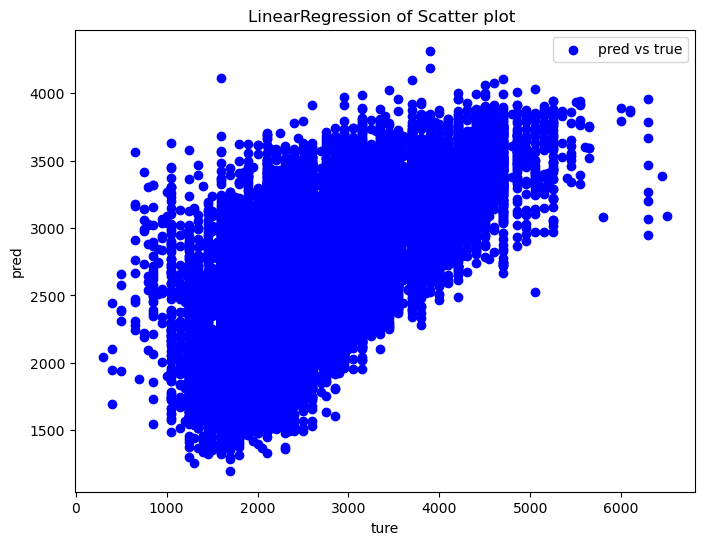

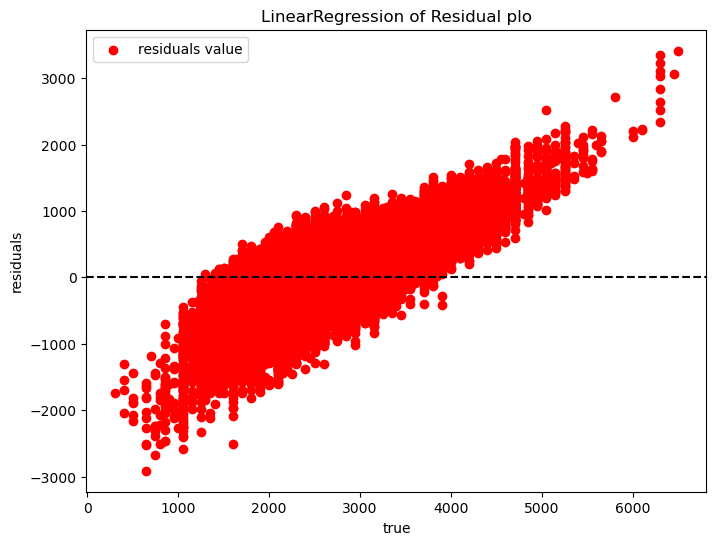

In [61]:

name_ElasticNet = 'Elastic Net'
model_ElasticNet = ElasticNet(alpha= 0.1, l1_ratio=0.5, random_state=42)
print(f'Training {name_ElasticNet}...')

model_ElasticNet.fit(X_train, y_train)
y_pred = model_ElasticNet.predict(X_test)

y_train_pred = model_ElasticNet.predict(X_train)

print(f'{name_ElasticNet} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_ElasticNet + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_ElasticNet} training result saved.\n')

print('{} evaluation:\n'.format(name_ElasticNet))

mse_ElasticNet = mean_squared_error(y_train, y_train_pred)
mae_ElasticNet = mean_absolute_error(y_train, y_train_pred)
print(mse_ElasticNet,mae_ElasticNet)

# not good




#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('ElasticNet of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('ElasticNet of Residual plot')
plt.show()






In [102]:
name_GradientBoosting = 'Gradient Boosting'
params = {
    "n_estimators": 500,
    "max_depth": 2,
    "min_samples_split": 5,
    "learning_rate": 0.03,
    "random_state" : 42,
    "verbose" : 1,
}

model_GradientBoosting = GradientBoostingRegressor(** params)
print(f'Training {name_GradientBoosting}...')

model_GradientBoosting.fit(X_train, y_train)
y_pred = model_GradientBoosting.predict(X_test)

y_train_pred = model_GradientBoosting.predict(X_train)

print(f'{name_GradientBoosting} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_GradientBoosting + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_GradientBoosting} training result saved.\n')

print('{} evaluation:\n'.format(name_GradientBoosting))

mse_GradientBoosting = mean_squared_error(y_train, y_train_pred)
mae_GradientBoosting = mean_absolute_error(y_train, y_train_pred)
print(mse_GradientBoosting,mae_GradientBoosting)

Training Gradient Boosting...
      Iter       Train Loss   Remaining Time 
         1      477287.7243           49.07s
         2      467498.7702           54.90s
         3      458260.8549           51.85s
         4      449572.3233           50.21s
         5      441372.0568           49.31s
         6      433660.2471           48.40s
         7      426381.0349           47.81s
         8      419521.4542           47.79s
         9      413025.7297           48.31s
        10      406907.6335           48.96s
        20      361054.7877           46.10s
        30      333696.9400           47.43s
        40      315886.8326           49.73s
        50      303497.5221           50.19s
        60      293975.9139           48.97s
        70      284775.5695           47.58s
        80      277793.1179           46.57s
        90      272012.6119           47.32s
       100      267231.7959           45.97s
       200      244824.0666           33.51s
       300      237880.5

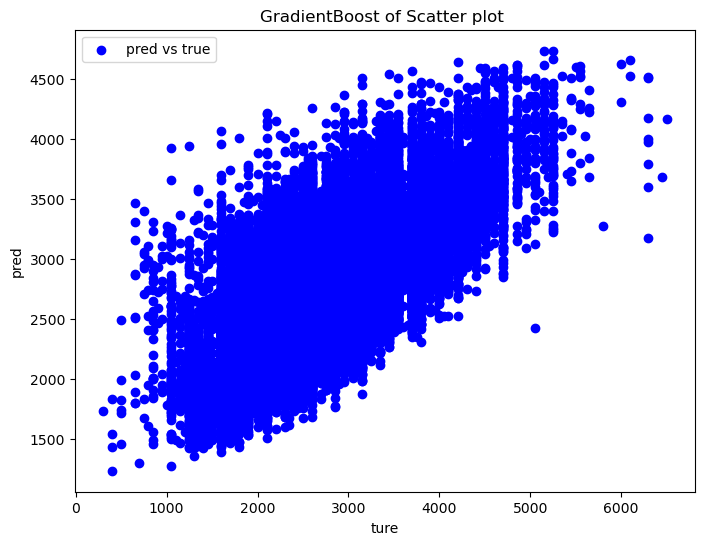

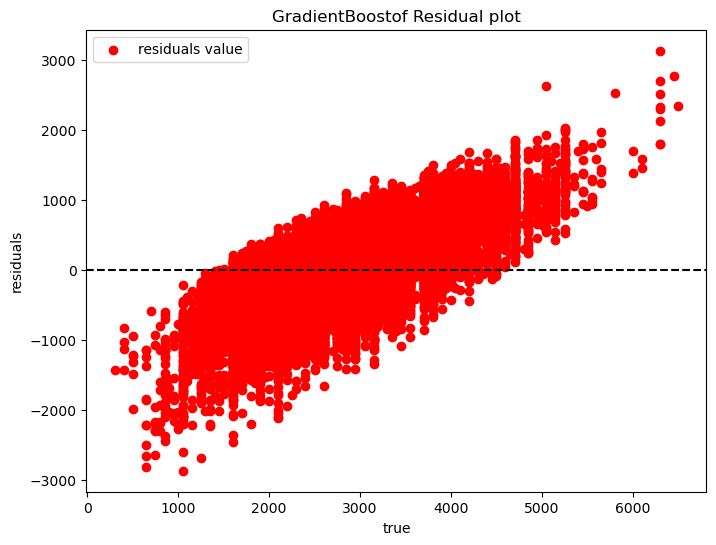

In [99]:


#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('GradientBoost of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('GradientBoostof Residual plot')
plt.show()





In [100]:

# Only considered hyperparameter: max depth of trees
param_choices = [1,2,3,4,5,6,7]
param_to_scores = {}
params1 = {
    "n_estimators": 500,
    "min_samples_split": 5,
    "learning_rate": 0.03,
    "random_state" : 42,
    "verbose" : 1,
}

for param in param_choices:
    regressor = GradientBoostingRegressor(** params1,max_depth=param)
    scores = cross_validate(regressor, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', return_train_score= True)
    rsme_train = scores['train_score'] * (-1)
    rsme_valid = scores['test_score'] * (-1)
    param_to_scores[param] = (rsme_train, rsme_valid)
    print('param = {}, RSME training = {:.1f} ({:.1f}), RSME validation = {:.1f} ({:.1f})'
          .format(param, np.mean(rsme_train), np.std(rsme_train), np.mean(rsme_valid), np.std(rsme_valid)))

      Iter       Train Loss   Remaining Time 
         1      480435.4205           21.50s
         2      473452.9762           20.65s
         3      466862.3350           19.76s
         4      460658.6986           19.92s
         5      454802.6935           19.88s
         6      449291.0113           21.45s
         7      444087.7424           21.04s
         8      439190.8458           20.79s
         9      434548.7864           20.45s
        10      430149.6362           20.27s
        20      396744.2875           18.56s
        30      373056.0646           17.94s
        40      355130.2789           17.33s
        50      341401.0361           17.05s
        60      330857.8074           16.85s
        70      322649.4250           16.47s
        80      315914.5368           16.01s
        90      310130.5624           15.58s
       100      305129.1181           15.09s
       200      275744.2986           11.24s
       300      261923.8451            7.38s
       40

        40      313683.7664           43.12s
        50      301213.0234           40.37s
        60      291609.2293           38.53s
        70      282561.9300           36.49s
        80      275460.2525           34.76s
        90      269538.6144           33.28s
       100      264680.5721           31.96s
       200      242383.6355           22.28s
       300      235281.4931           14.30s
       400      231955.9809            7.06s
       500      230051.7074            0.00s
      Iter       Train Loss   Remaining Time 
         1      479080.5859           37.26s
         2      469312.4465           36.75s
         3      460132.1346           36.27s
         4      451460.9725           36.74s
         5      443312.8195           36.44s
         6      435615.3887           36.28s
         7      428383.3606           36.00s
         8      421531.8167           35.79s
         9      415063.6850           35.67s
        10      408952.0296           36.27s
        2

         2      462853.3492            1.21m
         3      451444.4891            1.19m
         4      440667.4050            1.19m
         5      430555.8070            1.19m
         6      420980.5732            1.19m
         7      411991.4129            1.18m
         8      403477.9975            1.18m
         9      395401.9492            1.18m
        10      387786.5429            1.18m
        20      331293.1593            1.15m
        30      298011.2907            1.12m
        40      277508.2572            1.09m
        50      264211.0902            1.07m
        60      255460.1925            1.04m
        70      249248.0446            1.02m
        80      244826.9739           59.65s
        90      241408.1398           58.08s
       100      238752.1439           56.94s
       200      226570.2085           40.84s
       300      221924.3119           26.70s
       400      219164.1914           13.20s
       500      217129.9353            0.00s
      Iter

        60      244553.4805            1.34m
        70      238527.6254            1.31m
        80      234365.2681            1.27m
        90      231171.7630            1.24m
       100      228593.9546            1.20m
       200      217033.9402           51.60s
       300      212184.8332           33.47s
       400      208679.9721           16.46s
       500      205906.7784            0.00s
      Iter       Train Loss   Remaining Time 
         1      476050.5883            1.52m
         2      463429.9059            1.52m
         3      451468.7190            1.50m
         4      440286.0324            1.50m
         5      429669.3049            1.50m
         6      419724.7680            1.49m
         7      410235.1398            1.49m
         8      401334.7088            1.49m
         9      392979.2545            1.48m
        10      385050.6860            1.48m
        20      326128.3669            1.45m
        30      291470.7671            1.41m
        4

         2      459611.7303            2.25m
         3      446718.8040            2.24m
         4      434568.2668            2.23m
         5      423108.2796            2.23m
         6      412273.9251            2.22m
         7      401994.8738            2.22m
         8      392335.3504            2.22m
         9      383246.2901            2.22m
        10      374642.5068            2.21m
        20      310942.7471            2.17m
        30      274187.6479            2.12m
        40      252245.9197            2.08m
        50      238381.4074            2.03m
        60      228909.9497            1.98m
        70      222380.8604            1.93m
        80      217679.9414            1.88m
        90      213993.7260            1.83m
       100      210900.9097            1.79m
       200      196147.9645            1.28m
       300      189427.6432           50.45s
       400      184171.4340           25.09s
       500      179486.4851            0.00s
      Iter

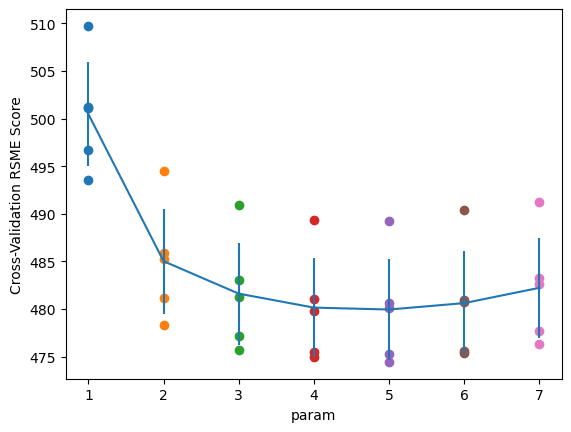

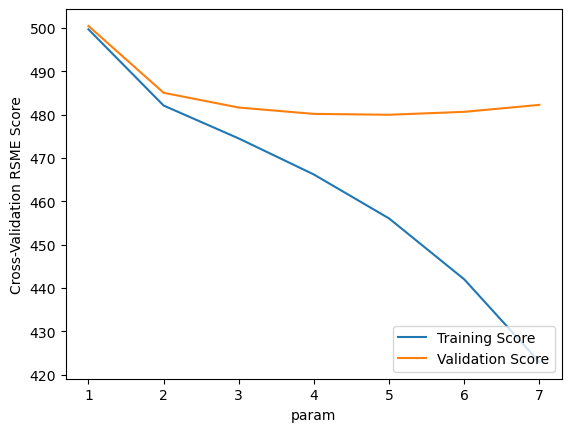

In [101]:
plot_validation_results(param_to_scores)

plot_scores(param_to_scores)



### ！！！！！ 图2显示2最好，但是结果带进去很差

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.1s finished


Random Forest training completed.
Random Forest training result saved.

Random Forest evaluation:

265102.8756409491 395.50372066229414


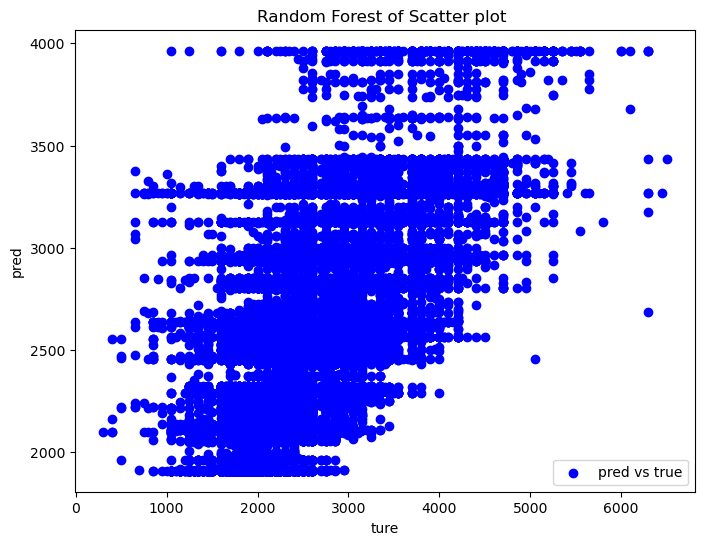

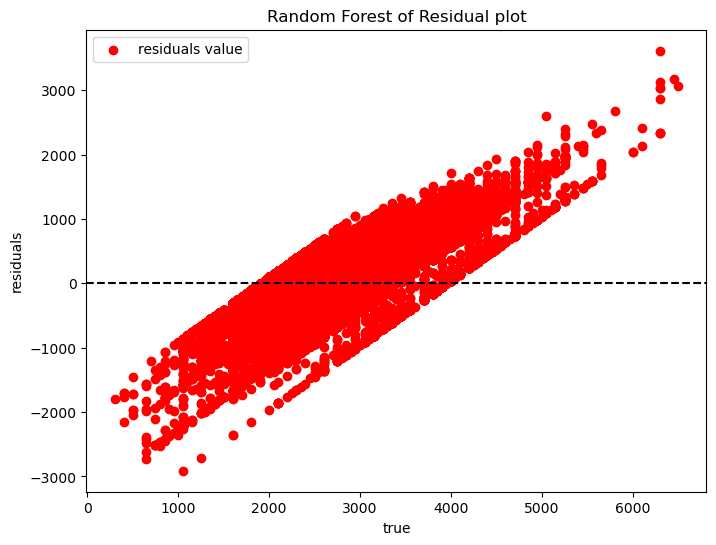

In [83]:

name_RandomForest = 'Random Forest'
model_RandomForest = RandomForestRegressor(random_state=42, verbose=1, n_jobs=-1, n_estimators = 250, max_depth = 4)
print(f'Training {name_RandomForest}...')

model_RandomForest.fit(X_train, y_train)
y_pred = model_RandomForest.predict(X_test)

y_train_pred = model_RandomForest.predict(X_train)

print(f'{name_RandomForest} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_RandomForest + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_RandomForest} training result saved.\n')

print('{} evaluation:\n'.format(name_RandomForest))

mse_RandomForest = mean_squared_error(y_train, y_train_pred)
mae_RandomForest = mean_absolute_error(y_train, y_train_pred)
print(mse_RandomForest,mae_RandomForest)

# not good

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('Random Forest of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('Random Forest of Residual plot')
plt.show()



In [ ]:
plot_validation_results(param_to_scores)

plot_scores(param_to_scores)

Training AdaBoost...
AdaBoost training completed.
AdaBoost training result saved.

AdaBoost evaluation:

273061.430840429 409.2086321608908


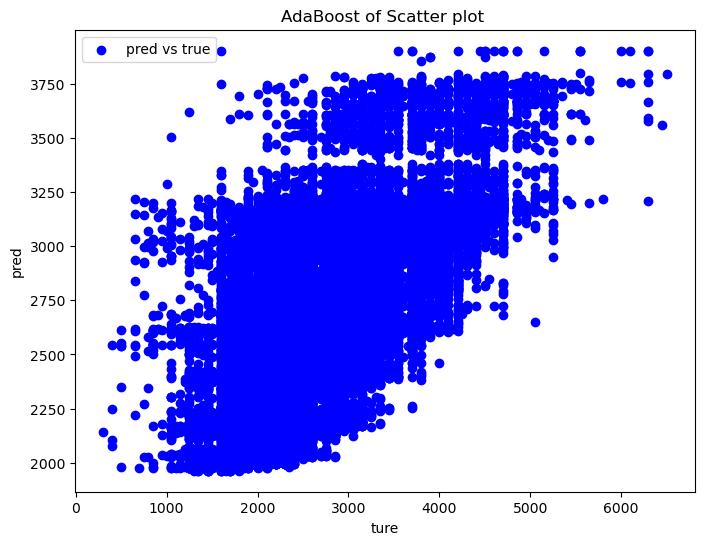

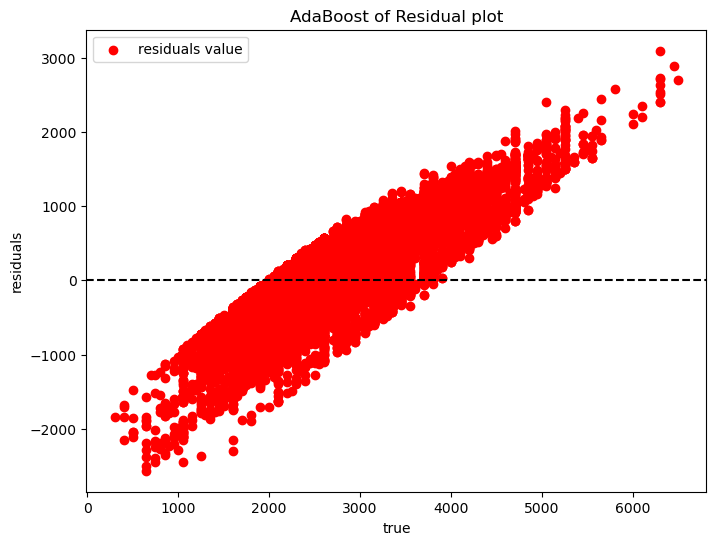

In [82]:
name_AdaBoost = 'AdaBoost'
base_regressor = DecisionTreeRegressor(max_depth=4)
params = {
    "n_estimators": 500,
    "learning_rate": 0.03,
    "random_state" : 42,
}
model_AdaBoost = AdaBoostRegressor(** params)
print(f'Training {name_AdaBoost}...')

model_AdaBoost.fit(X_train, y_train)
y_pred = model_AdaBoost.predict(X_test)

y_train_pred = model_AdaBoost.predict(X_train)

print(f'{name_AdaBoost} training completed.')
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_AdaBoost + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_AdaBoost} training result saved.\n')

print('{} evaluation:\n'.format(name_AdaBoost))

mse_AdaBoost = mean_squared_error(y_train, y_train_pred)
mae_AdaBoost = mean_absolute_error(y_train, y_train_pred)
print(mse_AdaBoost,mae_AdaBoost)

# not good

#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('AdaBoost of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('AdaBoost of Residual plot')
plt.show()


